In [1]:
from PIL import Image
import os

In [4]:
filesPaper = os.listdir('paper')
filesWhiteboard = os.listdir('whiteboard')
for idx, file in enumerate(filesWhiteboard):
    img = Image.open('whiteboard/' + file)
    img = img.resize((168, 168), Image.ANTIALIAS)
    img.save('raw/' + str(idx+23) + '.png')

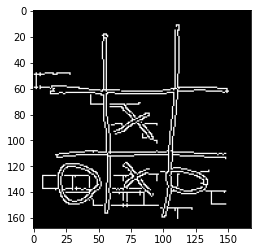

In [13]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('raw/10.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = cv2.GaussianBlur(img1, (3,3), 0)
sobelxy = cv2.Canny(img1, 75, 150)


plt.imshow(sobelxy, cmap='gray')